<a href="https://colab.research.google.com/github/victorjms/kmeans_seg/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro

# Kmeans

## Tarea

Tu tarea es realizar la segmentación de clientes utilizando KMeans. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, los años de educación en el empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresa el índice para separarlos por segmentos. Puedes descargar los datos aquí. Los datos originales provienen de esta fuente.

# Parte 1

Utiliza KMeans para crear varios segmentos de clientes.

# Parte 2

Explora tus diversos segmentos de clientes. ¿Cuáles son las tendencias en los segmentos? Crea al menos dos visualizaciones que exploren las tendencias en los grupos.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
filename = '/content/drive/My Drive/Coding_Dojo/Semana_08/cust_seg.csv' # colocamos la ruta del archivo a importar
df = pd.read_csv(filename) # colocamos el contenido del archivo en "df"
df # imprimimos "df"

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [17]:
df = df.drop(['Unnamed: 0'], axis=1)

In [18]:
df = df.set_index('Customer Id')

In [19]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [21]:
!pip install kneed

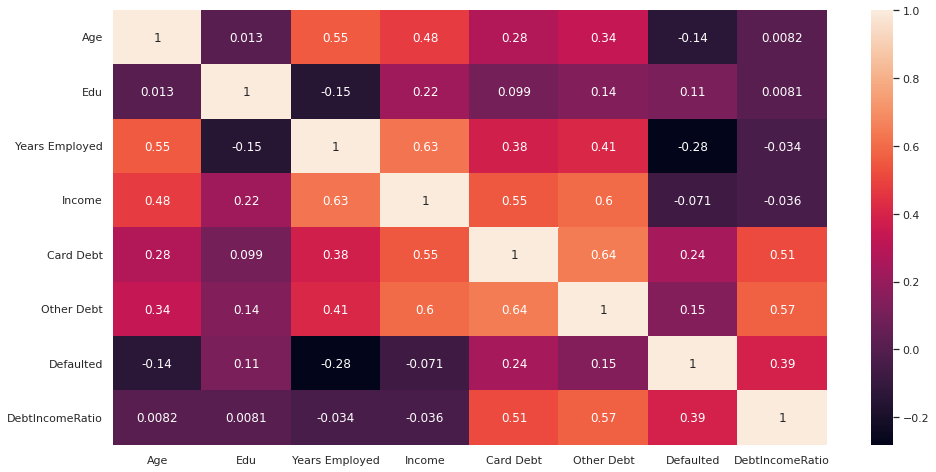

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [26]:
# Escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df)

In [43]:
# 3d plot
from mpl_toolkits.mplot3d import Axes3D 
# customización de texto
from termcolor import colored as cl 
# normalización de datos
from sklearn.preprocessing import StandardScaler 
# Algoritmo K-means 
from sklearn.cluster import KMeans 

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

print(cl(df.head(), attrs = ['bold']))


             Age  Edu  Years Employed  ...  Defaulted  DebtIncomeRatio  cluster_num
Customer Id                            ...                                         
1             41    2               6  ...        0.0              6.3            0
2             47    1              26  ...        0.0             12.8            2
3             33    2              10  ...        1.0             20.9            0
4             29    2               4  ...        0.0              6.3            0
5             47    1              31  ...        0.0              7.2            1

[5 rows x 9 columns]


# Análisis de datos

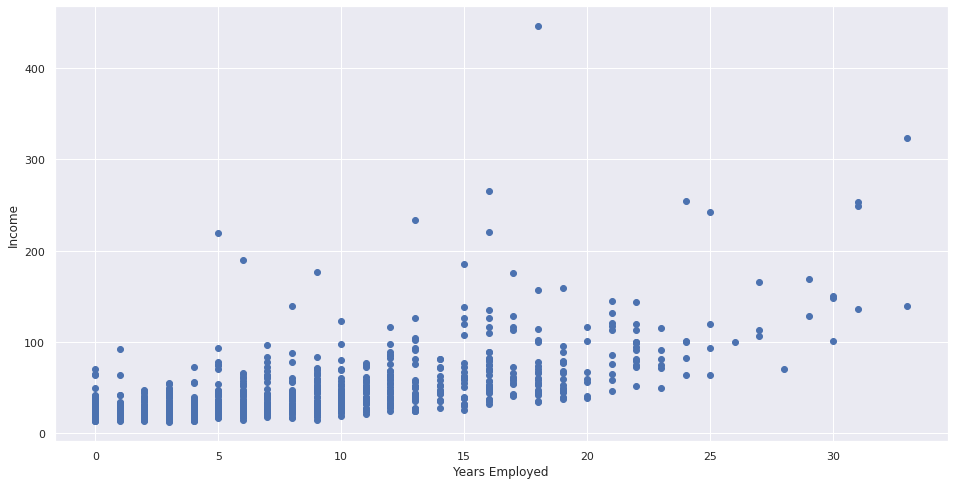

In [28]:
# Visualizar datos
plt.scatter(df['Years Employed'], df['Income'])
plt.xlabel('Years Employed')
plt.ylabel('Income');


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


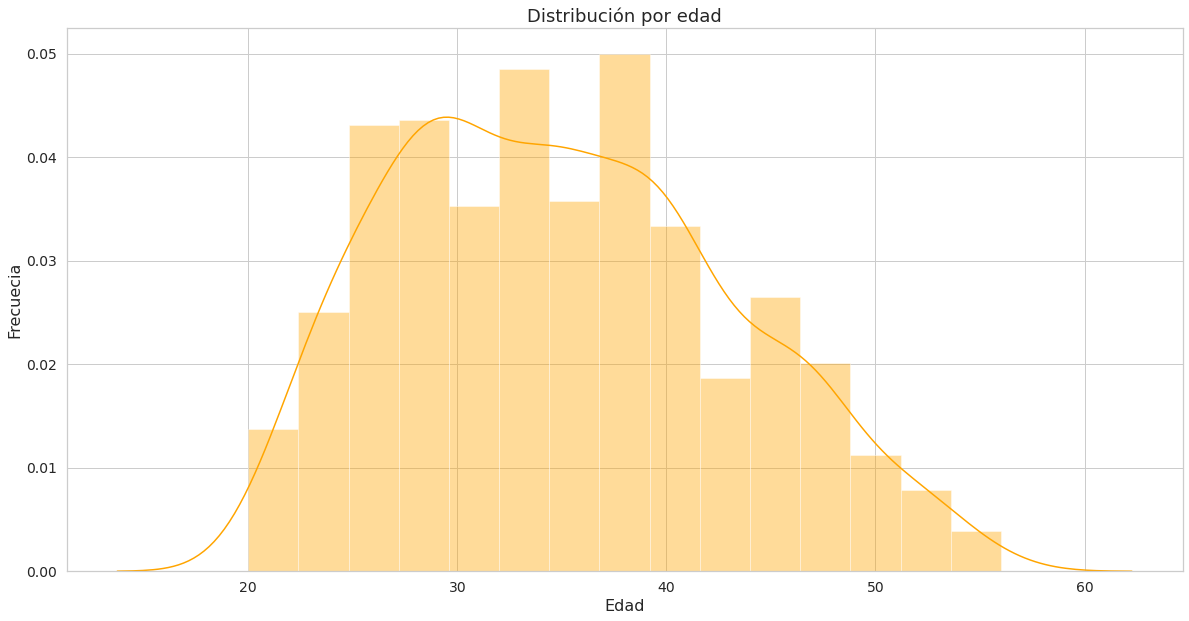

In [45]:


# Distribución de la edad

print(cl(df['Age'].describe(), attrs = ['bold']))

sb.distplot(df['Age'], 
            color = 'orange')
plt.title('Distribución por edad', 
          fontsize = 18)
plt.xlabel('Edad', 
           fontsize = 16)
plt.ylabel('Frecuecia', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


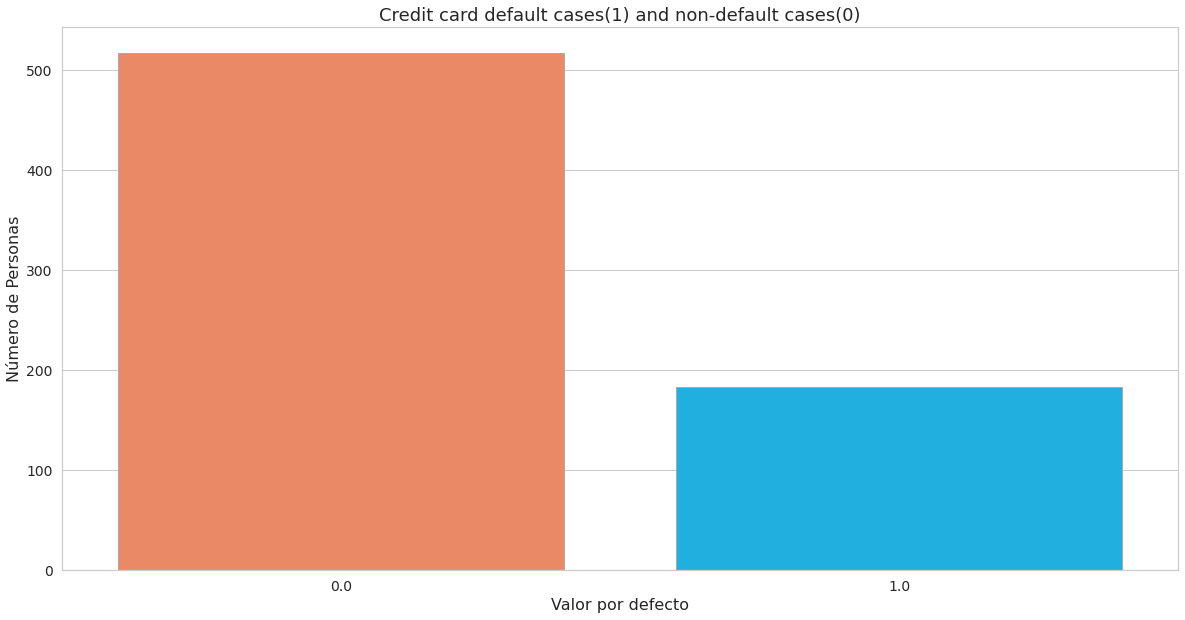

In [46]:
# Casos de credit card default

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Valor por defecto', 
           fontsize = 16)
plt.ylabel('Número de Personas', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


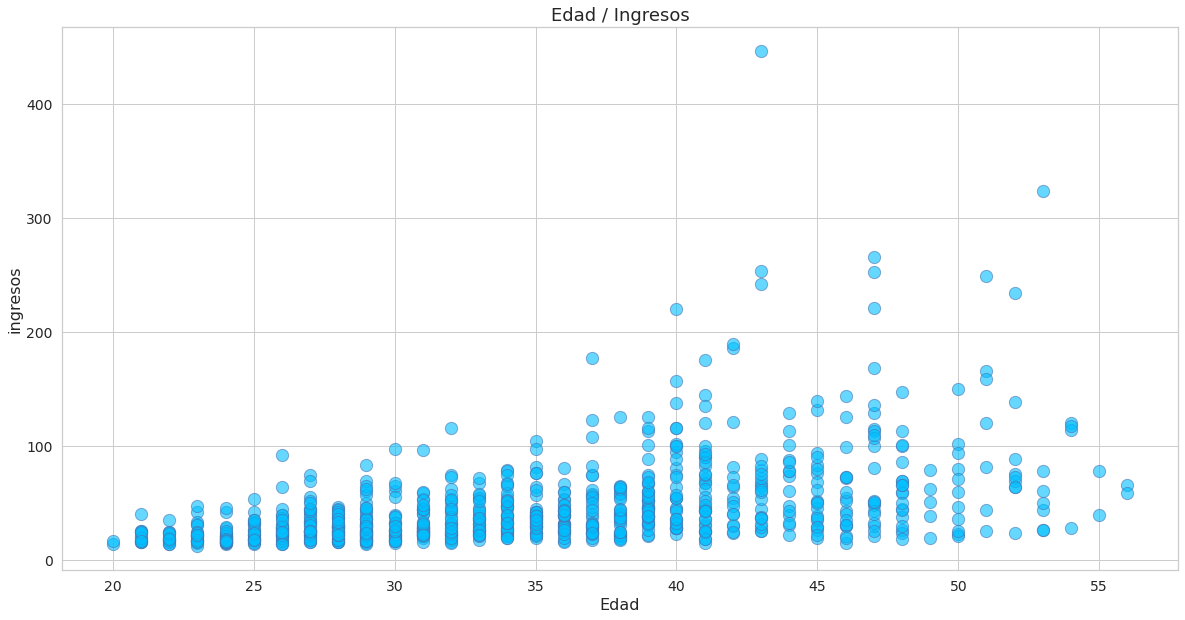

In [48]:
# Edad vs ingresos

sb.scatterplot('Age', 'Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('Edad / Ingresos', 
          fontsize = 18)
plt.xlabel('Edad', 
           fontsize = 16)
plt.ylabel('ingresos', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()



In [49]:
# Procesamiento de datos
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])



Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509 -0.5485468 ]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677  1.8799156 ]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385 -0.5485468 ]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509 -0.5485468 ]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653  0.6656844 ]]


In [50]:
# Modelamiento

clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))



[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


In [51]:
# Perspectivas del modelo

df['cluster_num'] = labels
print(cl(df.head(), attrs = ['bold']))



             Age  Edu  Years Employed  ...  Defaulted  DebtIncomeRatio  cluster_num
Customer Id                            ...                                         
1             41    2               6  ...        0.0              6.3            0
2             47    1              26  ...        0.0             12.8            2
3             33    2              10  ...        1.0             20.9            0
4             29    2               4  ...        0.0              6.3            0
5             47    1              31  ...        0.0              7.2            1

[5 rows x 9 columns]


In [52]:
print(cl(df.groupby('cluster_num').mean(), attrs = ['bold']))

area = np.pi * (df.Edu) ** 4


                   Age       Edu  ...  Defaulted  DebtIncomeRatio
cluster_num                       ...                            
0            32.964561  1.614792  ...   0.285185        10.094761
1            45.388889  2.666667  ...   0.285714         7.322222
2            41.333333  1.956284  ...   0.171233        10.724590

[3 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


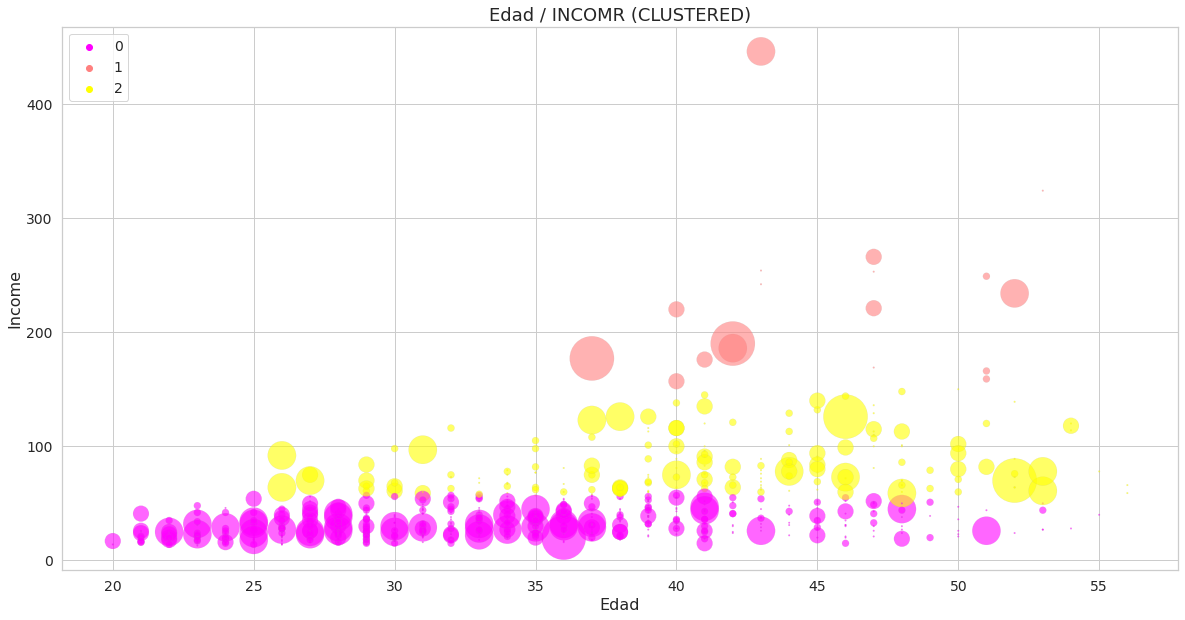

In [54]:
sb.scatterplot('Age', 'Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Edad / INCOMR (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Edad', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()

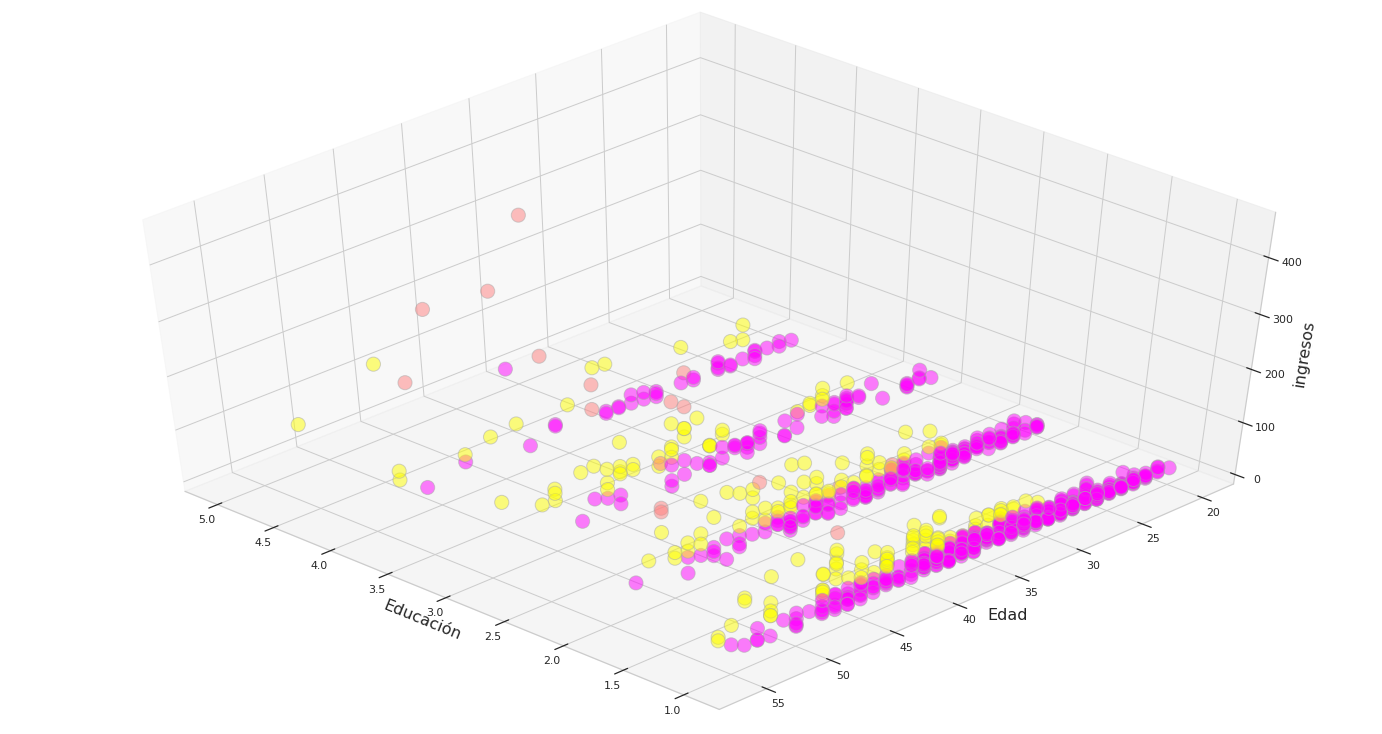

In [55]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)
plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Educación', 
              fontsize = 16)
ax.set_ylabel('Edad', 
              fontsize = 16)
ax.set_zlabel('ingresos', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()